In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

**Dataset loading**

In [ ]:
df = pd.read_csv("SleepStudy.csv")
df.insert(0, 'Id', df.index)
df.insert(23, 'early_wakeup', np.where(df['WeekdayRise'] <= 9, 1,0 ))

df.describe()

,Id,Gender,ClassYear,NumEarlyClass,EarlyClass,GPA,ClassesMissed,CognitionZscore,PoorSleepQuality,DepressionScore,...,Drinks,WeekdayBed,WeekdayRise,WeekdaySleep,early_wakeup,WeekendBed,WeekendRise,WeekendSleep,AverageSleep,AllNighter
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,126.000000,0.403162,2.478261,1.735178,0.664032,3.243794,2.209486,-0.000040,6.256917,5.201581,...,5.569170,24.847708,8.585652,7.866008,0.687747,25.584585,10.204111,8.217233,7.965929,0.134387
std,73.179004,0.491505,1.037263,1.536922,0.473264,0.404284,3.240307,0.706828,2.919761,6.000899,...,4.095119,1.033697,0.943339,1.167788,0.464331,1.273104,1.401356,1.366785,0.964840,0.341744
min,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,-1.620000,1.000000,0.000000,...,0.000000,21.800000,5.500000,3.000000,0.000000,21.500000,5.250000,4.000000,4.950000,0.000000
25%,63.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,-0.480000,4.000000,1.000000,...,3.000000,24.200000,8.000000,7.200000,0.000000,24.880000,9.250000,7.250000,7.430000,0.000000
50%,126.000000,0.000000,2.000000,2.000000,1.000000,3.300000,1.000000,-0.010000,6.000000,3.000000,...,5.000000,24.800000,8.500000,7.950000,1.000000,25.500000,10.250000,8.250000,8.000000,0.000000
75%,189.000000,1.000000,3.000000,3.000000,1.000000,3.500000,3.000000,0.440000,8.000000,7.000000,...,8.000000,25.500000,9.150000,8.600000,1.000000,26.250000,11.000000,9.250000,8.590000,0.000000
max,252.000000,1.000000,4.000000,5.000000,1.000000,4.000000,20.000000,1.960000,18.000000,35.000000,...,24.000000,29.100000,12.020000,10.970000,1.000000,30.250000,15.000000,12.750000,10.620000,1.000000


**Data description**

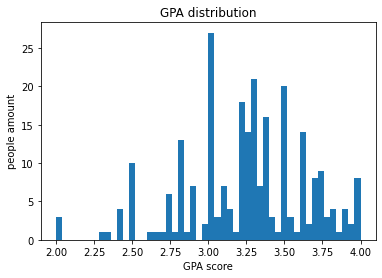

In [ ]:
plt.hist(df['GPA'], bins = 50)
plt.title('GPA distribution')
plt.xlabel('GPA score')
plt.ylabel('people amount')
plt.show()

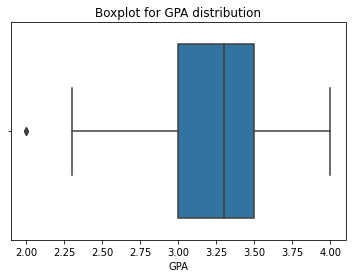

In [ ]:
sns.boxplot(data=df, x = 'GPA')
plt.title('Boxplot for GPA distribution')
plt.show()

In [ ]:
df['GPA'].describe()

count    253.000000
mean       3.243794
std        0.404284
min        2.000000
25%        3.000000
50%        3.300000
75%        3.500000
max        4.000000
Name: GPA, dtype: float64

In [70]:
Q3 = np.quantile(df['GPA'], 0.75)
Q1 = np.quantile(df['GPA'], 0.25)
IQR = Q3 - Q1

var = np.var(df['GPA'])

range = max(df['GPA']) - min(df['GPA'])

print(f'Variance: {var}')
print(f'Interquartile range: {IQR}')
print(f'Range: {range}', end = '\n\n')


def three_sigma_rule(data):
  counter = 0
  mean = np.mean(data)
  sd = np.std(data)
  for element in data:
    if (mean - 3*sd) <= float(element) <= (mean + 3*sd):
      counter += 1
  return (counter/len(data))*100

three_sigma_rule(df['GPA'])

Variance: 0.1627998312737271
Interquartile range: 0.5
Range: 2.0



98.81422924901186

So from the above plots and descriptive statistics, we can conclude that the distribution of the GPA is almost symmetric: $Mean \approx Median$. Also, interquartile range and variance are not high, which tells us that data is more centered around the mean rather than spread. In addition, I checked whether the three-sigma rule holds for our GPA distribution, and the answer is yes.

**Exploration of the emotional state of the students**

The proportion of students that experience high and normal stress levels



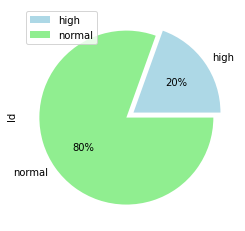

In [ ]:
colors = ['lightblue', 'lightgreen']
  
explode = (0.05, 0.05)

print('The proportion of students that experience high and normal stress levels', end =  '\n\n')

df.groupby(['Stress']).sum().plot(
    kind='pie', y='Id', autopct='%1.0f%%',
  colors=colors, explode=explode)

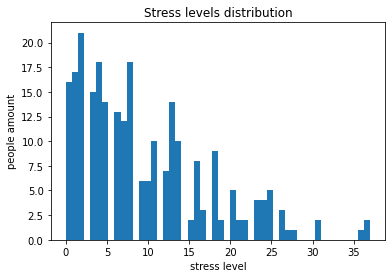

count    253.000000
mean       9.466403
std        7.951980
min        0.000000
25%        3.000000
50%        8.000000
75%       14.000000
max       37.000000
Name: StressScore, dtype: float64


In [72]:
plt.hist(df['StressScore'], bins = 50)
plt.title('Stress levels distribution')
plt.xlabel('stress level')
plt.ylabel('people amount')
plt.show()

The proportion of students that experience severe(high), moderate and normal depression levels



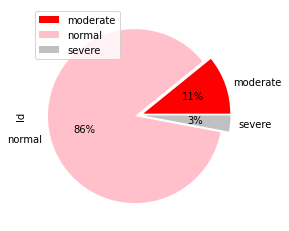

In [ ]:
colors = ['red', 'pink', 'silver']
  
explode = (0.05, 0.05, 0.05)

print('The proportion of students that experience severe(high), moderate and normal depression levels', end =  '\n\n')

df.groupby(['DepressionStatus']).sum().plot(
    kind='pie', y='Id', autopct='%1.0f%%',
  colors=colors, explode=explode)

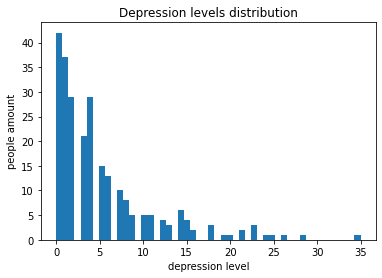

In [ ]:
plt.hist(df['DepressionScore'], bins = 50)
plt.title('Depression levels distribution')
plt.xlabel('depression level')
plt.ylabel('people amount')
plt.show()

The proportion of students that experience severe(high), moderate and normal anxiety levels



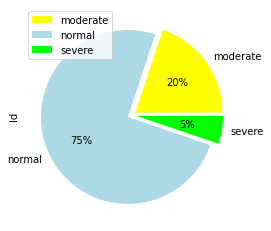

In [ ]:
colors = ['yellow','lightblue','lime']
  
explode = (0.05, 0.05, 0.05)

print('The proportion of students that experience severe(high), moderate and normal anxiety levels', end =  '\n\n')

df.groupby(['AnxietyStatus']).sum().plot(
    kind='pie', y='Id', autopct='%1.0f%%',
  colors=colors, explode=explode)

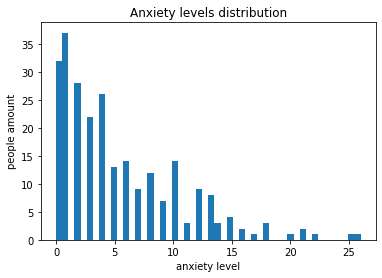

In [ ]:
plt.hist(df['AnxietyScore'], bins = 50)
plt.title('Anxiety levels distribution')
plt.xlabel('anxiety level')
plt.ylabel('people amount')
plt.show()

From the above histograms, we see that the majority of the students experience low anxiety, stress, and depression levels, which makes our data distributions right-skewed. The same information we can receive after looking at the pie charts, which tells us the same thing: the vast majority of people experience normal depression, anxiety, and stress levels.

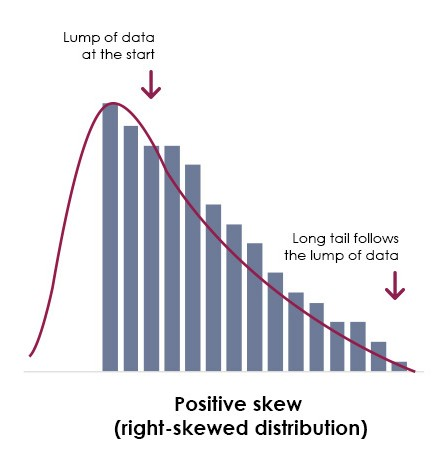

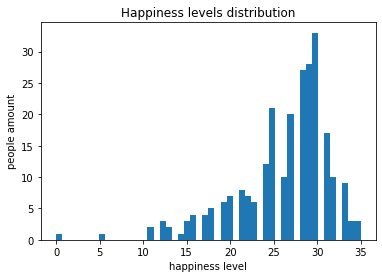

In [73]:
plt.hist(df['Happiness'], bins = 50)
plt.title('Happiness levels distribution')
plt.xlabel('happiness level')
plt.ylabel('people amount')
plt.show()

On the contrary, the histogram of the happiness levels is more left-skewed, which means that the majority of students in the dataset are happy and in a good mood. It is logical because, as we see from the previous plots people are not highly depressed or stressed. 


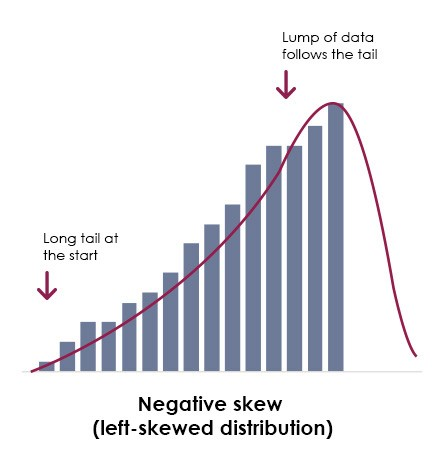

**Sleep habits exploration**

The proportion of students that owls, larks or neither lark nor owl



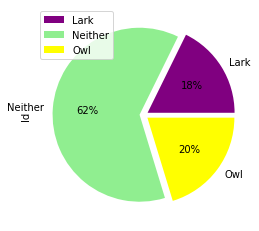

In [ ]:
colors = ['purple', 'lightgreen', 'yellow']
  
explode = (0.05, 0.05, 0.05)

print('The proportion of students that owls, larks or neither lark nor owl', end =  '\n\n')

df.groupby(['LarkOwl']).sum().plot(
    kind='pie', y='Id', autopct='%1.0f%%',
  colors=colors, explode=explode)

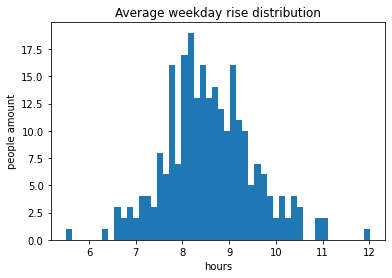

In [ ]:
plt.hist(df['WeekdayRise'], bins = 50)
plt.title('Average weekday rise distribution')
plt.xlabel('hours')
plt.ylabel('people amount')
plt.show()

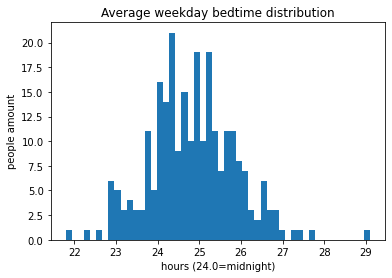

In [ ]:
plt.hist(df['WeekdayBed'], bins = 50)
plt.title('Average weekday bedtime distribution')
plt.xlabel('hours (24.0=midnight)')
plt.ylabel('people amount')
plt.show()

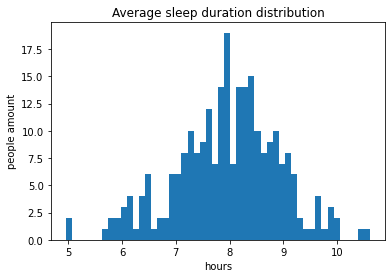

In [ ]:
plt.hist(df['AverageSleep'], bins = 50)
plt.title('Average sleep duration distribution')
plt.xlabel('hours')
plt.ylabel('people amount')
plt.show()

In [ ]:
df['AverageSleep'].describe()

count    253.000000
mean       7.965929
std        0.964840
min        4.950000
25%        7.430000
50%        8.000000
75%        8.590000
max       10.620000
Name: AverageSleep, dtype: float64

We see that the majority of students have good sleeping habits: average sleep time is around 8 hours per day, a lot of people don't stay very late at night and as a result, their wake up time is also normal (average rise time is around 8:40, not at the noon). Of course, there are some people who go to bed very late (for example at 3 a.m. and even later) or those who wake up very early. Those students belong to owl and lark groups respectively. We can see the proportions on the pie chart.

**Correletion calcualtions**

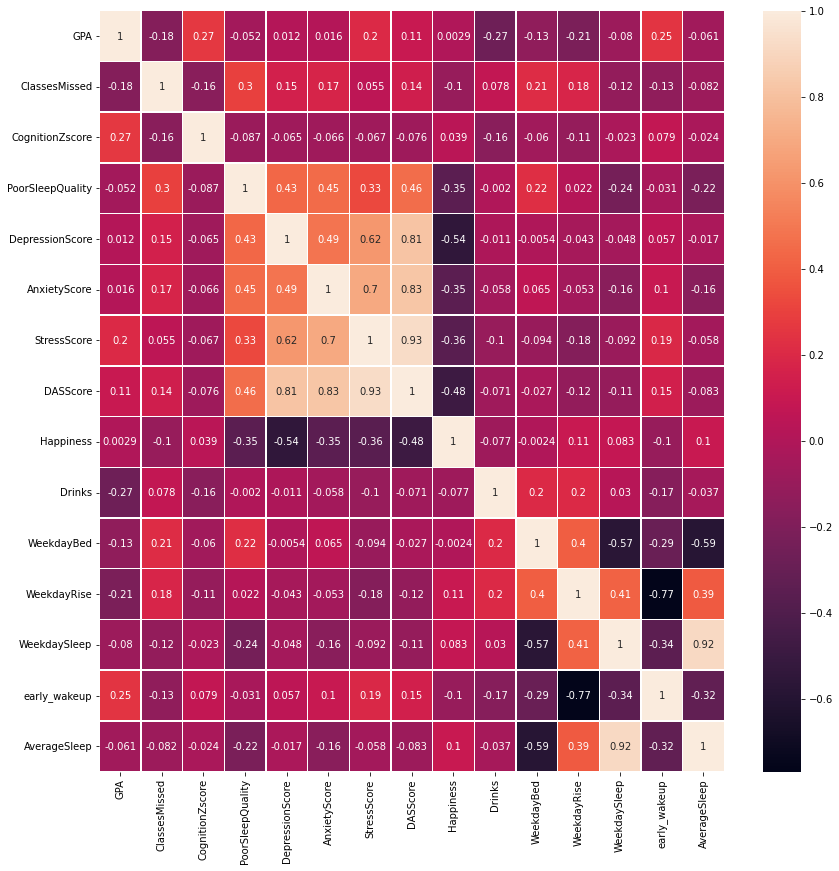

In [ ]:
column_idx = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,27]
plt.subplots(figsize=(14,14)) 
sns.heatmap(df.iloc[:,column_idx].corr(), annot=True, linewidths=.5)

From the heatmap, we see that depression, anxiety, and stress scores are correlated with each other, which is logical. A person, which is continually exposed to high-stress levels, is more probable to fall into depression. Also, stress has a positive effect on anxiety levels. At the same time, all of these three factors (depression, anxiety, and stress) are correlated with students' GPA. However, this correlation is not high, and not very sufficient. In the case of depression, we see that it's negatively correlated, which means that for high depression levels GPA is lower. But the situation with stress and anxiety is completely different, they are positively correlated with GPA. The possible explanation is that we know that non-daily stress in small portions can positively affect a person's performance, to be more precise it boosts brain activity and is called eustress. Above I plotted charts of students' emotional states and we have seen that the majority of people in the dataset don't experience high-stress levels, so it's one of the reasons why the correlation is positive. The same situation is with anxiety. Also on the plot, we see some correlations between sleep factors, for example, the dependency between the time of going to bed and average sleep duration, and others. 

**Linear regression constructing**

At this stage, I will construct an OLS regression model and test the initial hypotheses, that I stated in my interim report. To be more precise I am going to check how stress, depression, anxiety, and poor sleep quality affect a person's GPA. My first predictions were that their effect is negative.

I am going to construct a model that predicts a student's GPA based on the data about a person`s cognitive abilities, depression, anxiety, and stress scores. Also to improve model performance I added two additional independent variables: drinks (measures the number of alcoholic drinks per week) and early_wakeup. Early_wakeup is a binary variable, which is equal to one if a student wakes up before 9 a.m. The logic behind this is that when a person wakes up early in the morning it's more productive, rather than when he leaves his bed at the noon. So I expect that it should influence positively GPA.

In [ ]:
model = smf.ols(formula='GPA~CognitionZscore + AnxietyScore + DepressionScore + StressScore + Drinks + early_wakeup + PoorSleepQuality', data=df.dropna())
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     9.965
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           6.03e-11
Time:                        08:39:50   Log-Likelihood:                -97.671
No. Observations:                 253   AIC:                             211.3
Df Residuals:                     245   BIC:                             239.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.2019      0.076  

After running a regression, I received the estimated values of coefficients, and based on them I am going to determine the relations between the dependent variable (GPA) and independent ones. As we see depression and anxiety have a negative effect, but stress at the same time positively affects regressand. Being more precise one-point increase in stress level holding all other factors fixed will increase GPA by 0.0196. The possible reason for such an effect is that not high stress (eustress) can be beneficial for a person`s performance. This suggestion becomes even stronger when we recall that in the dataset the vast majority of students experience normal stress levels. Also, we observe that PoorSleepQuality has a negative effect on a person's GPA, which is logical because this variable measures how bad sleep is (the higher values correspond to worse sleep quality).

Unfortunately, not all independent variables are statistically significant. To be more precise not significant variables are DepressionScore and PoorSleepQuality, we can see that from the p-values column in a regression summary, which is too high for those two variables. We conclude that the regressor is informative and we shouldn't exclude it from the model if it is significant at least at the 5% level. But in our case, this doesn`t hold we can check it by conducting some statistical tests. To do it I will state two hypotheses: conservative and alternative. 

$H_{0}$: $\beta_{2}$  = 0

$H_{1}$: $\beta_{2}$  $\not=$ 0

Remark: $\beta_{2}$ is coefficient near DepressionScore.

To test the hypothesis I will use the $t$ statistic (for my dependent variable), by checking if it is in the rejection region.

$t$ = -1.604

If $|t|$ > $c$ then we reject $H_{0}$, where $c$ is a percentile of t-distribution with 245 df.

$c$ for a two-sided test at the 5% significance level will equal 1.969694.
So we see that we can`t reject the $H_{0}$ in the favor of $H_{1}$, which means that our variable is not statistically significant and we can exclude it from the model.

The same test we can conduct for PoorSleepQuality and see that it`s also insignificant.

The possible reason why those two variables occur to be insignificant can be a correlation in the model between independent variables. As we have seen in the above heatmap depression is correlated with stress and anxiety. So when we include all of those three variables we allow some correlation in the model which can result in biased regression results. Another possible reason is that the dataset is relatively small and it`s hard to find some strong relations between variables.

Finally, I want to pay your attention to the $R^2$, which is not very high. That means that model is not predicting well GPA based on the information given by independent variables. However, this regression still can be used to determine relations between variables. Of course, we can`t precisely determine the impact of each variable, but at least we know the direction of the relationship. One of the reasons, why $R^2$ is small can be some omitted variable. For example, it can be associated with a person's native abilities, of course, I included in the model variable that gives us some information about a student's cognitive abilities, but we should understand that it is approximate information and we can't fully measure person's skills, abilities. Other problems can be the small dataset size and some correlation in the model.